In [1]:
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

from nn_models import ICPRegressionEnsemble, ICPRegressionMCDropout
from icp import ICPNearestNeighborDist, ICPMahalanobisDist
from martingale import PowerMartingale

from utils import TEP_DataLoader, apply_gaussian_noise, apply_linear_drift
from utils import TEPDATASETTEST, TEPDATASETTRAIN

In [2]:
dataloader = TEP_DataLoader()
dataloader.load_training_data()

In [3]:
X, y = dataloader.get_continuous_dataset(length=100000, target_value="xmeas_35")
X_train, X_valtest, y_train, y_valtest = train_test_split(X, y, test_size=0.50, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_valtest, y_valtest, test_size=0.5, random_state=42)

In [4]:
mh = ICPMahalanobisDist()
mh.fit(X_train)
mh.calibrate(X_val)

In [5]:
pmh = PowerMartingale(model=mh, alarm_threshold=20)

In [8]:
for fault_id in [1, 2, 5, 6, 8, 10, 12, 13]:
    runs_X, runs_y = dataloader.get_runs_dataset(length=20, fault=fault_id, target_value="xmeas_35")

    first_alarm_steps_ensemble = []
    false_negatives_ensemble = 0


    for i in range(runs_X.shape[0]):
        _, _, first_alarm_step = pmh.score(runs_X[i])
        if first_alarm_step is not None:
            first_alarm_steps_ensemble.append(first_alarm_step)
        else:
            false_negatives_ensemble += 1


    print("Fault Type: " + str(fault_id))
    print("Average delay mh: " + str(np.mean(first_alarm_steps_ensemble)))
    print("False negatives mh: " + str(false_negatives_ensemble))
    

Fault Type: 1
Average delay mh: 28.25
False negatives mh: 0
Fault Type: 2
Average delay mh: 39.0
False negatives mh: 0
Fault Type: 5
Average delay mh: 26.9
False negatives mh: 0
Fault Type: 6
Average delay mh: 26.3
False negatives mh: 0
Fault Type: 8
Average delay mh: 46.55
False negatives mh: 0
Fault Type: 10
Average delay mh: 115.0
False negatives mh: 0
Fault Type: 12
Average delay mh: 37.6
False negatives mh: 0
Fault Type: 13
Average delay mh: 74.35
False negatives mh: 0


In [5]:
import matplotlib.pyplot as plt
import copy

In [6]:
fault_id = False

runs_X, runs_y = dataloader.get_runs_dataset(length=20, fault=fault_id, target_value="xmeas_35")

In [7]:
import shap
from sklearn.metrics import mean_squared_error

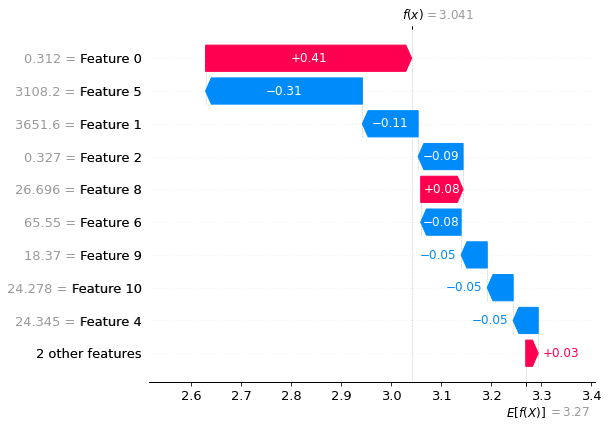

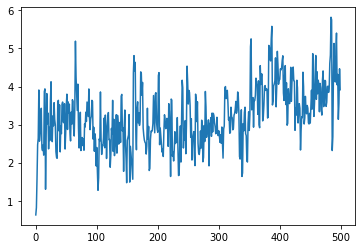

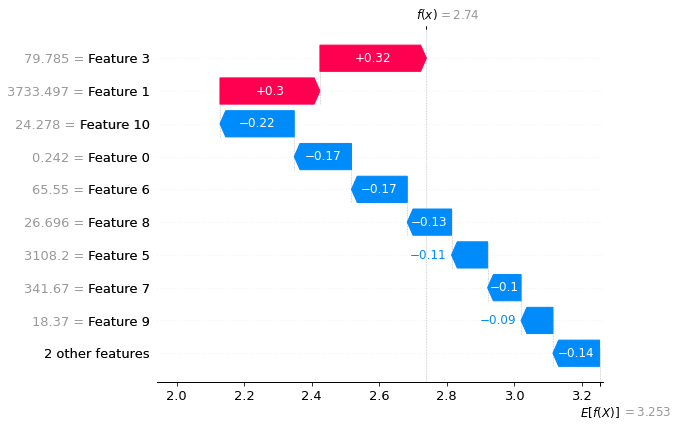

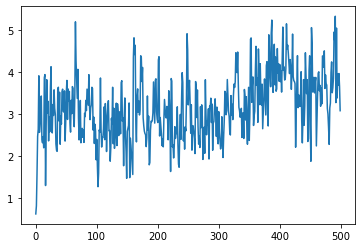

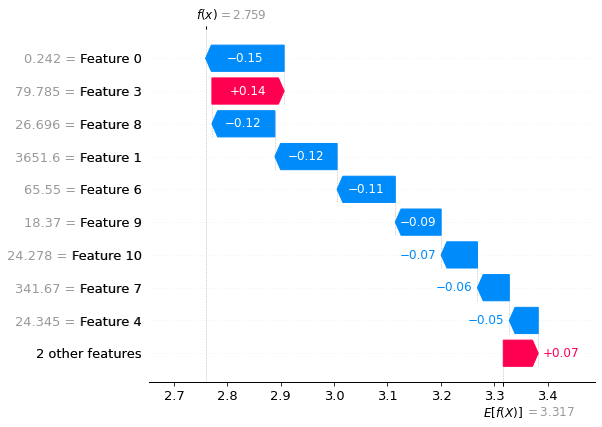

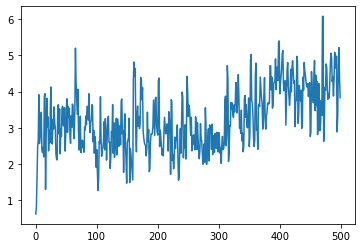

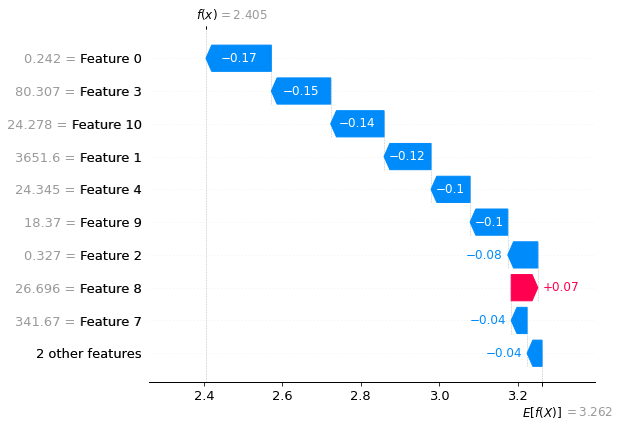

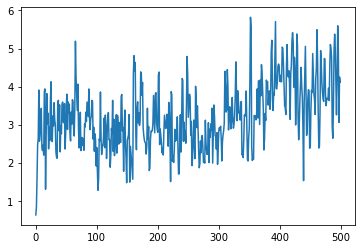

KeyboardInterrupt: 

In [8]:
for i in range(11):
    test_X = apply_linear_drift(runs_X[0], index=i, increase_samples=300, magnitude=3.0, delay=200)
    explainer = shap.Explainer(mh.nc_score, test_X)
    shap_values = explainer(test_X)
    shap.plots.waterfall(shap_values[450])
    
    nc_score = mh.nc_score(test_X)
    plt.plot(nc_score)
    plt.show()

In [8]:
# ensemble = ICPRegressionEnsemble(
#        n_members=10, input_shape=X_train.shape[-1])
ensemble = ICPRegressionMCDropout(n_forward_passes=20, input_shape=X_train.shape[-1], 1)
ensemble.load()
# ensemble.load(file_prefix="./models/tep_ensemble_nll_")
ensemble.calibrate(X_val)

ValueError: Cannot assign to variable batch_normalization/gamma:0 due to variable shape (1,) and value shape (11,) are incompatible

In [10]:
mean_nc_scores = []
mean_errors = []

prediction = ensemble.predict(runs_X[0])
nc_score = ensemble.nc_score(runs_X[0])
print("No Drift")
print("Mean nc_score:" + str(np.mean(nc_score)))
print("mse: " + str(np.sqrt(mean_squared_error(prediction, runs_y[0]))))

mean_errors.append(np.sqrt(mean_squared_error(prediction, runs_y[0])))
mean_nc_scores.append(np.mean(nc_score))


for i in range(11):
    delay = 250
    test_X = apply_linear_drift(runs_X[0], index=i, increase_samples=1, magnitude=1.5, delay=250)
    # explainer = shap.Explainer(ensemble.nc_score, test_X)
    # shap_values = explainer(test_X)
    # shap.plots.waterfall(shap_values[450])
    
    
    nc_score = ensemble.nc_score(test_X)
    prediction = ensemble.predict(test_X)

    print("Input Drift on: " + str(i))
    print("Mean nc_score:" + str(np.mean(nc_score)))
    print("mse: " +    str(np.sqrt(mean_squared_error(prediction, runs_y[0]))))

    mean_errors.append(np.sqrt(mean_squared_error(prediction, runs_y[0])))
    mean_nc_scores.append(np.mean(nc_score))

    # plt.plot(nc_score)
    # plt.show()
    # plt.plot(prediction-runs_y[0])
    # plt.show()

    # plt.scatter(nc_score[0:delay], np.abs(prediction-runs_y[0])[0:delay])
    # plt.scatter(nc_score[delay:], np.abs(prediction-runs_y[0])[delay:])
    # plt.show()

No Drift
Mean nc_score:0.00070809934
mse: 0.10004926917867758
Input Drift on: 0
Mean nc_score:0.00070747756
mse: 0.1000412019503775
Input Drift on: 1
Mean nc_score:0.00071438216
mse: 0.10001542429884334
Input Drift on: 2
Mean nc_score:0.00070755003
mse: 0.10005358765035237
Input Drift on: 3
Mean nc_score:0.00071344373
mse: 0.10011144151631762
Input Drift on: 4
Mean nc_score:0.00070449826
mse: 0.09999819835197483
Input Drift on: 5
Mean nc_score:0.0006870079
mse: 0.09984612039486879
Input Drift on: 6
Mean nc_score:0.00070331193
mse: 0.10003626112189425
Input Drift on: 7
Mean nc_score:0.00071035005
mse: 0.10005929005368638
Input Drift on: 8
Mean nc_score:0.00070874405
mse: 0.10004187626426393
Input Drift on: 9
Mean nc_score:0.00070948026
mse: 0.10006897367430939
Input Drift on: 10
Mean nc_score:0.000709507
mse: 0.10003533684671706


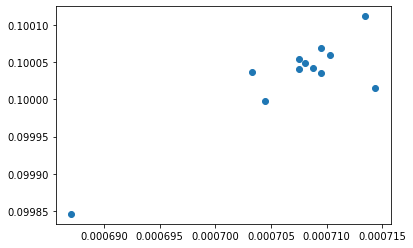

In [12]:
plt.scatter(mean_nc_scores, mean_errors)
plt.show()

No Drift
Mean nc_score:2.981113533156164
mse: 0.10004926917867758
Input Drift on: 0
Mean nc_score:3.1407404189676145
mse: 0.1000412019503775
Input Drift on: 1
Mean nc_score:3.106394865655857
mse: 0.10001542429884334
Input Drift on: 2
Mean nc_score:3.1457192512152305
mse: 0.10005358765035237
Input Drift on: 3
Mean nc_score:3.113871673014406
mse: 0.10011144151631762
Input Drift on: 4
Mean nc_score:3.134732710082889
mse: 0.09999819835197483
Input Drift on: 5
Mean nc_score:3.4113969153380777
mse: 0.09984612039486879
Input Drift on: 6
Mean nc_score:3.2927744004768074
mse: 0.10003626112189425
Input Drift on: 7
Mean nc_score:3.102938976548001
mse: 0.10005929005368638
Input Drift on: 8
Mean nc_score:3.1619765494212744
mse: 0.10004187626426393
Input Drift on: 9
Mean nc_score:3.2163335000945565
mse: 0.10006897367430939
Input Drift on: 10
Mean nc_score:3.2417417677331986
mse: 0.10003533684671706


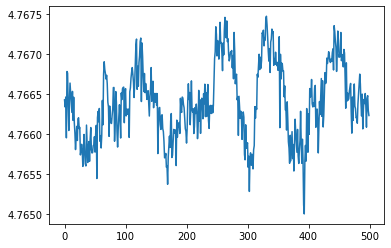

In [15]:
mean_nc_scores = []
mean_errors = []

prediction = ensemble.predict(runs_X[0])
nc_score = mh.nc_score(runs_X[0])
print("No Drift")
print("Mean nc_score:" + str(np.mean(nc_score)))
print("mse: " + str(np.sqrt(mean_squared_error(prediction, runs_y[0]))))

plt.plot(prediction)

mean_errors.append(np.sqrt(mean_squared_error(prediction, runs_y[0])))
mean_nc_scores.append(np.mean(nc_score))

for i in range(11):
    delay = 250
    test_X = apply_linear_drift(runs_X[0], index=i, increase_samples=1, magnitude=1.5, delay=250)
    # explainer = shap.Explainer(ensemble.nc_score, test_X)
    # shap_values = explainer(test_X)
    # shap.plots.waterfall(shap_values[450])
    
    
    nc_score = mh.nc_score(test_X)
    prediction = ensemble.predict(test_X)

    print("Input Drift on: " + str(i))
    print("Mean nc_score:" + str(np.mean(nc_score)))
    print("mse: " +    str(np.sqrt(mean_squared_error(prediction, runs_y[0]))))

    mean_errors.append(np.sqrt(mean_squared_error(prediction, runs_y[0])))
    mean_nc_scores.append(np.mean(nc_score))

    # plt.plot(nc_score)
    # plt.show()
    # plt.plot(prediction-runs_y[0])
    # plt.show()

    # plt.scatter(nc_score[0:delay], np.abs(prediction-runs_y[0])[0:delay])
    # plt.scatter(nc_score[delay:], np.abs(prediction-runs_y[0])[delay:])
    # plt.show()

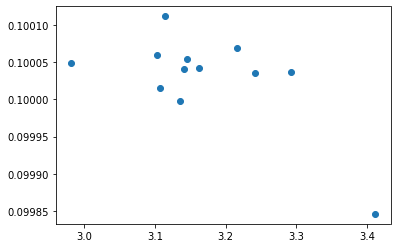

In [14]:
plt.scatter(mean_nc_scores, mean_errors)
plt.show()